In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-08-02 13:18:10--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  90.2MB/s    in 0.7s    

2021-08-02 13:18:11 (90.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [4]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
model1 = tf.keras.models.Sequential([
                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)),
                    tf.keras.layers.MaxPooling2D(2,2),
                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                    tf.keras.layers.MaxPooling2D(2,2),
                    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
                    tf.keras.layers.MaxPooling2D(2,2),
                    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
                    tf.keras.layers.MaxPooling2D(2,2),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(512,activation = 'relu'),
                    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
model1.compile(loss = 'binary_crossentropy',
               optimizer = RMSprop(learning_rate=1e-4),
               metrics = ['accuracy'])

In [11]:
history1 = model1.fit(
    train_generator,
    epochs = 50,
    validation_data = validation_generator,
    steps_per_epoch = 100,
    validation_steps = 50,
    verbose = 1
)

Epoch 1/50
100/100 [==============================] - 41s 87ms/step - loss: 0.6921 - accuracy: 0.5285 - val_loss: 0.6851 - val_accuracy: 0.5130
Epoch 2/50
100/100 [==============================] - 9s 88ms/step - loss: 0.6774 - accuracy: 0.5740 - val_loss: 0.6709 - val_accuracy: 0.5960
Epoch 3/50
100/100 [==============================] - 9s 93ms/step - loss: 0.6595 - accuracy: 0.6160 - val_loss: 0.6559 - val_accuracy: 0.6000
Epoch 4/50
100/100 [==============================] - 9s 94ms/step - loss: 0.6370 - accuracy: 0.6425 - val_loss: 0.6166 - val_accuracy: 0.6710
Epoch 5/50
100/100 [==============================] - 9s 91ms/step - loss: 0.6026 - accuracy: 0.6780 - val_loss: 0.6003 - val_accuracy: 0.6780
Epoch 6/50
100/100 [==============================] - 9s 91ms/step - loss: 0.5672 - accuracy: 0.7110 - val_loss: 0.5857 - val_accuracy: 0.6820
Epoch 7/50
100/100 [==============================] - 9s 91ms/step - loss: 0.5433 - accuracy: 0.7195 - val_loss: 0.5577 - val_accuracy: 0.730

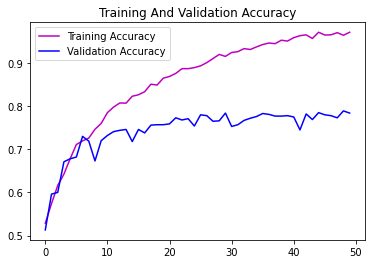

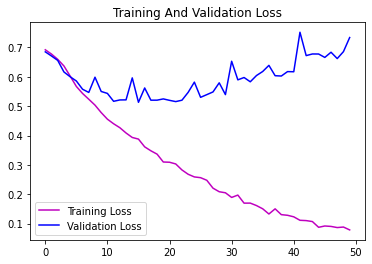

In [14]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'm', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'm', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()

In [30]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

model2 = tf.keras.models.Sequential([
                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)),
                    tf.keras.layers.MaxPooling2D(2,2),
                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                    tf.keras.layers.MaxPooling2D(2,2),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
                    tf.keras.layers.MaxPooling2D(2,2),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
                    tf.keras.layers.MaxPooling2D(2,2),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(512,activation = 'relu'),
                    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model2.compile(loss = 'binary_crossentropy',
               optimizer = RMSprop(learning_rate=1e-4),
               metrics = ['accuracy'])

--2021-08-02 14:56:36--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   305MB/s    in 0.2s    

2021-08-02 14:56:37 (305 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
history2 = model2.fit(
    train_generator,
    epochs = 50,
    validation_data = validation_generator,
    steps_per_epoch = 100,
    validation_steps = 50,
    verbose = 1
)

Epoch 1/50
100/100 [==============================] - 18s 175ms/step - loss: 0.7129 - accuracy: 0.5140 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 2/50
100/100 [==============================] - 18s 181ms/step - loss: 0.6954 - accuracy: 0.5095 - val_loss: 0.6913 - val_accuracy: 0.5850
Epoch 3/50
100/100 [==============================] - 18s 178ms/step - loss: 0.6893 - accuracy: 0.5305 - val_loss: 0.6896 - val_accuracy: 0.5310
Epoch 4/50
100/100 [==============================] - 18s 177ms/step - loss: 0.6815 - accuracy: 0.5570 - val_loss: 0.6744 - val_accuracy: 0.5730
Epoch 5/50
100/100 [==============================] - 17s 169ms/step - loss: 0.6780 - accuracy: 0.5615 - val_loss: 0.6711 - val_accuracy: 0.6200
Epoch 6/50
100/100 [==============================] - 17s 168ms/step - loss: 0.6755 - accuracy: 0.5735 - val_loss: 0.6639 - val_accuracy: 0.5820
Epoch 7/50
100/100 [==============================] - 18s 179ms/step - loss: 0.6679 - accuracy: 0.5775 - val_loss: 0.6538 - val_ac

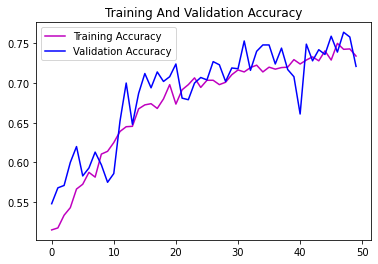

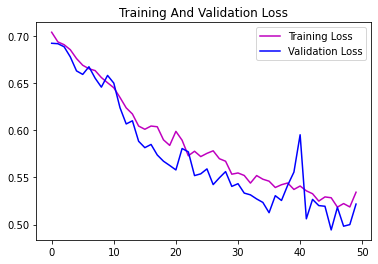

In [20]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'm', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'm', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()

In [21]:
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150,150,3),
                                include_top = False,
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

--2021-08-02 14:29:34--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 2607:f8b0:400e:c01::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   125MB/s    in 0.7s    

2021-08-02 14:29:35 (125 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0          

In [22]:
last_layer = pre_trained_model.get_layer('mixed7')
print(last_layer.output_shape)
last_output = last_layer.output

(None, 7, 7, 768)


In [24]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1,activation = 'sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer = RMSprop(lr = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [26]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

--2021-08-02 14:43:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   182MB/s    in 0.4s    

2021-08-02 14:43:38 (182 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
history3 = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 1)

Epoch 1/20
100/100 [==============================] - 22s 189ms/step - loss: 0.3748 - accuracy: 0.8495 - val_loss: 0.0995 - val_accuracy: 0.9590
Epoch 2/20
100/100 [==============================] - 19s 185ms/step - loss: 0.2310 - accuracy: 0.9095 - val_loss: 0.1422 - val_accuracy: 0.9520
Epoch 3/20
100/100 [==============================] - 20s 195ms/step - loss: 0.1918 - accuracy: 0.9235 - val_loss: 0.1012 - val_accuracy: 0.9640
Epoch 4/20
100/100 [==============================] - 18s 180ms/step - loss: 0.2021 - accuracy: 0.9160 - val_loss: 0.1000 - val_accuracy: 0.9600
Epoch 5/20
100/100 [==============================] - 18s 180ms/step - loss: 0.1794 - accuracy: 0.9400 - val_loss: 0.1547 - val_accuracy: 0.9500
Epoch 6/20
100/100 [==============================] - 19s 190ms/step - loss: 0.1731 - accuracy: 0.9395 - val_loss: 0.1348 - val_accuracy: 0.9600
Epoch 7/20
100/100 [==============================] - 19s 187ms/step - loss: 0.1745 - accuracy: 0.9385 - val_loss: 0.1329 - val_ac

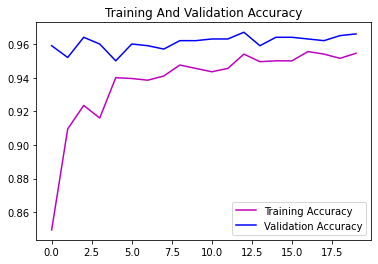

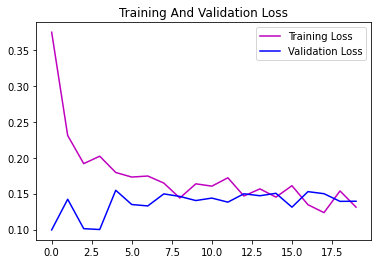

In [28]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'm', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'm', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()